## Cricket Analysis and Predictions

### Cricket...

a sport that doesn't require any introduction in India

a sport for which people worship to make their favorite team win the battle

a sport which is liked by all people irrespective of the age

a sport where players create carnage in the field

a sport which unites all the people

a sport which increases the physical fitness of the people

a sport which unites players across all countries

Apart from the sport, it teaches us many lessons including life lessons

It teaches us Statistics
It teaches us Math
It teaches us Visualizations
It teaches us Predictions

As a cricket lover, I made this Notebook which teaches us the life cycle of a Data Science project with facts and figures.

Data Credits: ESPN-CRICINFO

With all the context set, Now Let's Dive into the technical part.

You can see visualizations, player statistics, country wise data, SQL Queries in accordance with Pandas and Vice Versa

#### Importing Required Packages

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import re
import pickle

#### Importing Data

In [2]:
batting_data = pd.read_csv('All_Countries_ODI_Bats_Orig.csv',encoding = 'cp1252')
bowling_data = pd.read_csv('All_Countries_ODI_Bowls_Orig.csv',encoding = 'cp1252')

Have a Look at Batting and Bowling Data

###### SQL Query:

`Select top 5 * from batting_data`

In [3]:
batting_data.head()

,Player_Name,Span,Matches,Innings,Not_Outs,Runs_Scored,Highest_Score,Average,Balls_Faced,Strike_Rate,Centuries,Half_Centuries,Duck_Out,Fours,Sixes,Is_Selected
0,V Kohli (INDIA),2008-2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,1095,119,1
1,KC Sangakkara (Asia/ICC/SL),2005-2015,281,269,25,11054,169,45.3,13613,81.2,22,74,12,1084,78,0
2,MS Dhoni (Asia/INDIA),2005-2019,347,294,83,10754,183*,50.96,12289,87.5,10,73,9,824,228,1
3,AB de Villiers (Afr/SA),2005-2018,228,218,39,9577,176,53.5,9473,101.09,25,53,7,840,204,1
4,TM Dilshan (SL),2005-2016,278,260,28,9426,161*,40.62,10720,87.92,22,45,10,1046,54,0


###### SQL Query:

`Select top 5 * from bowling_data`

In [4]:
bowling_data.head()

,Player_Name,Span,Matches,Innings,Overs,Maidens,Runs_Given,Wickets,Bowling_Average,Economy,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,Is_Selected
0,Shakib Al Hasan (BDESH),2006-2019,206,203,1752.5,83,7857,260,30.21,4.48,40.4,8,2,1
1,Mashrafe Mortaza (Asia/BDESH),2005-2019,203,203,1680.5,112,8143,251,32.44,4.84,40.1,7,1,1
2,Shahid Afridi (Asia/ICC/PAK),2005-2015,207,201,1729.4,33,8035,242,33.2,4.64,42.8,3,7,0
3,MG Johnson (AUS),2005-2015,153,150,1248.1,74,6038,239,25.26,4.83,31.3,9,3,0
4,B Lee (AUS),2005-2012,130,129,1101.3,81,5263,220,23.92,4.77,30,8,6,0


#### Cleaning Data

We can see that Player Name is clubbed with his country name. So separate them

In [5]:
sbat = pd.Series(batting_data['Player_Name'])
sbow = pd.Series(bowling_data['Player_Name'])

In [6]:
batting_data['Player_Country']=sbat.apply(lambda st: st[st.find("(")+1:st.find(")")])
bowling_data['Player_Country']=sbow.apply(lambda st: st[st.find("(")+1:st.find(")")])

In [7]:
batting_data['Player_Name'] = batting_data['Player_Name'].str.split('(').str[0]
bowling_data['Player_Name'] = bowling_data['Player_Name'].str.split('(').str[0]

In [8]:
batting_data['Player_Country']=batting_data['Player_Country'].str.split('/').str[-1]
bowling_data['Player_Country']=bowling_data['Player_Country'].str.split('/').str[-1]

Split the Span column by From and Till

In [9]:
batting_data['Played_From']=batting_data['Span'].str.split('-').str[0]
batting_data['Played_Till']=batting_data['Span'].str.split('-').str[-1]

bowling_data['Played_From']=bowling_data['Span'].str.split('-').str[0]
bowling_data['Played_Till']=bowling_data['Span'].str.split('-').str[-1]

###### SQL Query:

`Alter Table batting_data
 Drop column Span`
 
 
`Alter Table bowling_data
 Drop column Span`

In [10]:
batting_data.drop(['Span'], axis=1,inplace=True)
bowling_data.drop(['Span'], axis=1,inplace=True)

Rearrange the columns

In [11]:
cols_bat = list(batting_data)
cols_bat.insert(1, cols_bat.pop(cols_bat.index('Player_Country')))
cols_bat.insert(2, cols_bat.pop(cols_bat.index('Played_From')))
cols_bat.insert(3, cols_bat.pop(cols_bat.index('Played_Till')))

cols_bowl = list(bowling_data)
cols_bowl.insert(1, cols_bowl.pop(cols_bowl.index('Player_Country')))
cols_bowl.insert(2, cols_bowl.pop(cols_bowl.index('Played_From')))
cols_bowl.insert(3, cols_bowl.pop(cols_bowl.index('Played_Till')))

In [12]:
batting_data = batting_data.ix[:, cols_bat]
bowling_data = bowling_data.ix[:, cols_bowl]

In [13]:
batting_data.head()

,Player_Name,Player_Country,Played_From,Played_Till,Matches,Innings,Not_Outs,Runs_Scored,Highest_Score,Average,Balls_Faced,Strike_Rate,Centuries,Half_Centuries,Duck_Out,Fours,Sixes,Is_Selected
0,V Kohli,INDIA,2008,2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,1095,119,1
1,KC Sangakkara,SL,2005,2015,281,269,25,11054,169,45.3,13613,81.2,22,74,12,1084,78,0
2,MS Dhoni,INDIA,2005,2019,347,294,83,10754,183*,50.96,12289,87.5,10,73,9,824,228,1
3,AB de Villiers,SA,2005,2018,228,218,39,9577,176,53.5,9473,101.09,25,53,7,840,204,1
4,TM Dilshan,SL,2005,2016,278,260,28,9426,161*,40.62,10720,87.92,22,45,10,1046,54,0


In [14]:
bowling_data.head()

,Player_Name,Player_Country,Played_From,Played_Till,Matches,Innings,Overs,Maidens,Runs_Given,Wickets,Bowling_Average,Economy,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,Is_Selected
0,Shakib Al Hasan,BDESH,2006,2019,206,203,1752.5,83,7857,260,30.21,4.48,40.4,8,2,1
1,Mashrafe Mortaza,BDESH,2005,2019,203,203,1680.5,112,8143,251,32.44,4.84,40.1,7,1,1
2,Shahid Afridi,PAK,2005,2015,207,201,1729.4,33,8035,242,33.2,4.64,42.8,3,7,0
3,MG Johnson,AUS,2005,2015,153,150,1248.1,74,6038,239,25.26,4.83,31.3,9,3,0
4,B Lee,AUS,2005,2012,130,129,1101.3,81,5263,220,23.92,4.77,30,8,6,0


Drop some junk data rows

###### SQL Query:

`Delete from batting_data where Player_Country ='1'`

`Delete from batting_data where Player_Country ='3'`

`Delete from batting_data where Average ='-'`

`Delete from batting_data where Strike_Rate ='-'`

In [15]:
batting_data.drop(batting_data[batting_data.Player_Country == '1'].index,inplace=True)
batting_data.drop(batting_data[batting_data.Player_Country == '3'].index,inplace=True)
batting_data.drop(batting_data[batting_data.Average == '-'].index,inplace=True)
batting_data.drop(batting_data[batting_data.Strike_Rate == '-'].index,inplace=True)
batting_data['Highest_Score'] = batting_data['Highest_Score'].str.replace('\W', '')

###### SQL Query:

`Delete from bowling_data where Player_Country ='1'`

`Delete from bowling_data where Player_Country ='3'`

`Delete from bowling_data where Bowling_Average ='-'`

`Delete from bowling_data where Bowling_Strike_Rate ='-'`

In [16]:
bowling_data.drop(bowling_data[bowling_data.Player_Country == '1'].index,inplace=True)
bowling_data.drop(bowling_data[bowling_data.Player_Country == '3'].index,inplace=True)
bowling_data.drop(bowling_data[bowling_data.Bowling_Average == '-'].index,inplace=True)
bowling_data.drop(bowling_data[bowling_data.Bowling_Strike_Rate == '-'].index,inplace=True)

In [17]:
batting_data.dtypes

Player_Name       object
Player_Country    object
Played_From       object
Played_Till       object
Matches            int64
Innings            int64
Not_Outs           int64
Runs_Scored        int64
Highest_Score     object
Average           object
Balls_Faced        int64
Strike_Rate       object
Centuries          int64
Half_Centuries     int64
Duck_Out           int64
Fours              int64
Sixes              int64
Is_Selected        int64
dtype: object

In [18]:
bowling_data.dtypes

Player_Name             object
Player_Country          object
Played_From             object
Played_Till             object
Matches                  int64
Innings                  int64
Overs                  float64
Maidens                  int64
Runs_Given               int64
Wickets                  int64
Bowling_Average         object
Economy                float64
Bowling_Strike_Rate     object
Four_Wicket_Hauls        int64
Five_Wicket_Hauls        int64
Is_Selected              int64
dtype: object

We can see that the Average, Strike Rate, Played_From, Played_Till columns are loaded as Objects. So convert them into floats and ints to make them useful

In [19]:
batting_data["Average"]=batting_data["Average"].astype(float)
batting_data["Strike_Rate"]=batting_data["Strike_Rate"].astype(float)
batting_data["Highest_Score"]=batting_data["Highest_Score"].astype(int)
batting_data["Played_From"]=batting_data["Played_From"].astype(int)
batting_data["Played_Till"]=batting_data["Played_Till"].astype(int)

In [20]:
bowling_data["Bowling_Average"]=bowling_data["Bowling_Average"].astype(float)
bowling_data["Bowling_Strike_Rate"]=bowling_data["Bowling_Strike_Rate"].astype(float)
bowling_data["Played_From"]=bowling_data["Played_From"].astype(int)
bowling_data["Played_Till"]=bowling_data["Played_Till"].astype(int)

Group by country to get the understanding of the batsman across all countries

###### SQL Query:

`select sum(Runs_Scored) as Total_Runss from batting_data group by Player_Country`

`select sum(Centuries) as Total_Centuriess from batting_data group by Player_Country`

`select sum(Half_Centuries) as Total_Half_Centuriess from batting_data group by Player_Country`

`select sum(Fours) as Total_Fourss from batting_data group by Player_Country`

`select sum(Sixes) as Total_Sixess from batting_data group by Player_Country`

In [21]:
Total_Runss=batting_data.groupby(['Player_Country'])['Runs_Scored'].sum()
Total_Centuriess=batting_data.groupby(['Player_Country'])['Centuries'].sum()
Total_Half_Centuriess=batting_data.groupby(['Player_Country'])['Half_Centuries'].sum()
Total_Fourss=batting_data.groupby(['Player_Country'])['Fours'].sum()
Total_Sixess=batting_data.groupby(['Player_Country'])['Sixes'].sum()

###### SQL Query:

`select sum(Strike_Rate)/count(Player_Country) as Average_Strike_Rates from batting_data group by Player_Country`


In [22]:
Average_Strike_Rates=batting_data.groupby(['Player_Country'])['Strike_Rate']\
.agg(lambda x: x.astype(float).sum())/batting_data.groupby(['Player_Country'])['Strike_Rate'].size()

In [23]:
country_batting_data=pd.DataFrame() 
country_batting_data['Total_Runs']=Total_Runss
country_batting_data['Total_Centuries']=Total_Centuriess
country_batting_data['Total_Half_Centuries']=Total_Half_Centuriess
country_batting_data['Total_Fours']=Total_Fourss
country_batting_data['Total_Sixes']=Total_Sixess
country_batting_data['Average_Strike_Rates']=Average_Strike_Rates

In [24]:
country_batting_data.reset_index(level=0, inplace=True)

View the Country wise Batting data

In [25]:
country_batting_data

,Player_Country,Total_Runs,Total_Centuries,Total_Half_Centuries,Total_Fours,Total_Sixes,Average_Strike_Rates
0,AFG,24502,19,133,2111,544,62.745854
1,AUS,73633,94,430,6442,1224,77.552805
2,BDESH,54023,52,295,5117,709,66.579565
3,BMUDA,5575,2,20,536,112,55.265758
4,CAN,11941,4,58,1136,165,57.360500
5,ENG,62010,86,312,5731,905,77.325385
6,HKG,4347,1,20,390,100,56.392414
7,ICC,17459,36,98,1815,276,81.894286
8,INDIA,92492,166,504,8967,1529,73.119375
9,IRE,36248,49,175,3319,624,71.694815


Group by country to get the understanding of the bowlers across all countries

###### SQL Query:

`select sum(Wickets) as Total_Wicketss from bowling_data group by Player_Country`

`select sum(Overs) as Total_Overss from bowling_data group by Player_Country`

`select sum(Maidens) as Total_Maidenss from bowling_data group by Player_Country`

`select sum(Four_Wicket_Hauls) as Total_Four_Wicket_Haulss from bowling_data group by Player_Country`

`select sum(Five_Wicket_Hauls) as Total_Five_Wicket_Haulssfrom bowling_data group by Player_Country`

In [26]:
Total_Wicketss=bowling_data.groupby(['Player_Country'])['Wickets'].sum()
Total_Overss=bowling_data.groupby(['Player_Country'])['Overs'].sum()
Total_Maidenss=bowling_data.groupby(['Player_Country'])['Maidens'].sum()
Total_Four_Wicket_Haulss=bowling_data.groupby(['Player_Country'])['Four_Wicket_Hauls'].sum()
Total_Five_Wicket_Haulss=bowling_data.groupby(['Player_Country'])['Five_Wicket_Hauls'].sum()

###### SQL Query:

`select sum(Economy)/count(Player_Country) as Average_Economy_Rates from bowling_data group by Player_Country`

`select sum(Bowling_Strike_Rate)/count(Player_Country) as Average_Bowling_Strike_Rates from bowling_data group by Player_Country`

In [27]:
Average_Economy_Rates=bowling_data.groupby(['Player_Country'])['Economy']\
.agg(lambda x: x.astype(float).sum())/bowling_data.groupby(['Player_Country'])['Economy'].size()

Average_Bowling_Strike_Rates=bowling_data.groupby(['Player_Country'])['Bowling_Strike_Rate']\
.agg(lambda x: x.astype(float).sum())/bowling_data.groupby(['Player_Country'])['Bowling_Strike_Rate'].size()

In [28]:
country_bowling_data=pd.DataFrame() 
country_bowling_data['Total_Wickets']=Total_Wicketss
country_bowling_data['Total_Overs']=Total_Overss
country_bowling_data['Total_Maidens']=Total_Maidenss
country_bowling_data['Total_Four_Wicket_Hauls']=Total_Four_Wicket_Haulss
country_bowling_data['Total_Five_Wicket_Hauls']=Total_Five_Wicket_Haulss
country_bowling_data['Average_Economy_Rate']=Average_Economy_Rates
country_bowling_data['Average_Bowling_Strike_Rate']=Average_Bowling_Strike_Rates

In [29]:
country_bowling_data.reset_index(level=0, inplace=True)

View the Country wise bowling data

In [30]:
country_bowling_data

,Player_Country,Total_Wickets,Total_Overs,Total_Maidens,Total_Four_Wicket_Hauls,Total_Five_Wicket_Hauls,Average_Economy_Rate,Average_Bowling_Strike_Rate
0,AFG,870,5360.9,304,24,8,4.757241,42.424138
1,AUS,2673,15877.4,780,75,40,5.243188,46.004348
2,BDESH,1757,11914.8,572,50,18,5.163200,47.368000
3,BMUDA,202,1398.5,80,5,1,5.610556,57.155556
4,CAN,413,2870.1,173,12,2,5.264857,47.342857
5,ENG,2243,14684.8,587,72,22,5.340984,48.140984
6,HKG,172,974.6,60,8,0,5.364286,36.235714
7,INDIA,2793,17907.5,814,75,21,5.381905,45.280952
8,IRE,1015,6689.9,362,34,7,5.240000,48.925000
9,KENYA,531,3609.7,240,13,1,4.992500,44.966667


### Visualizations

Text(0,0.5,'Runs Scored')

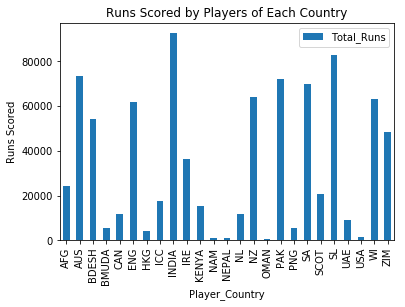

In [31]:
plt1=country_batting_data.plot(x="Player_Country", y="Total_Runs", kind='bar',title="Runs Scored by Players of Each Country",width=0.5) 
plt1.set_ylabel("Runs Scored")

Text(0,0.5,'Centuries Scored')

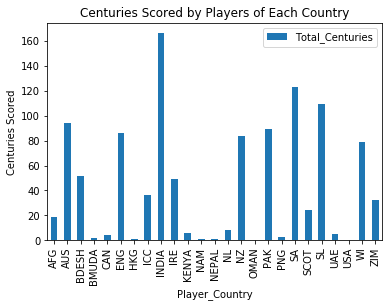

In [32]:
plt2=country_batting_data.plot(x="Player_Country", y="Total_Centuries", kind='bar',title="Centuries Scored by Players of Each Country",width=0.5) 
plt2.set_ylabel("Centuries Scored")

Text(0,0.5,'Half Centuries Scored')

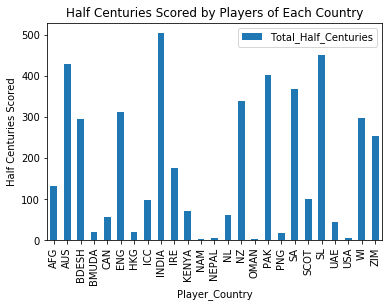

In [33]:
plt3=country_batting_data.plot(x="Player_Country", y="Total_Half_Centuries", kind='bar',title="Half Centuries Scored by Players of Each Country",width=0.5) 
plt3.set_ylabel("Half Centuries Scored")

Text(0.5,1,'Number of Fours Hit By Players of Each Country')

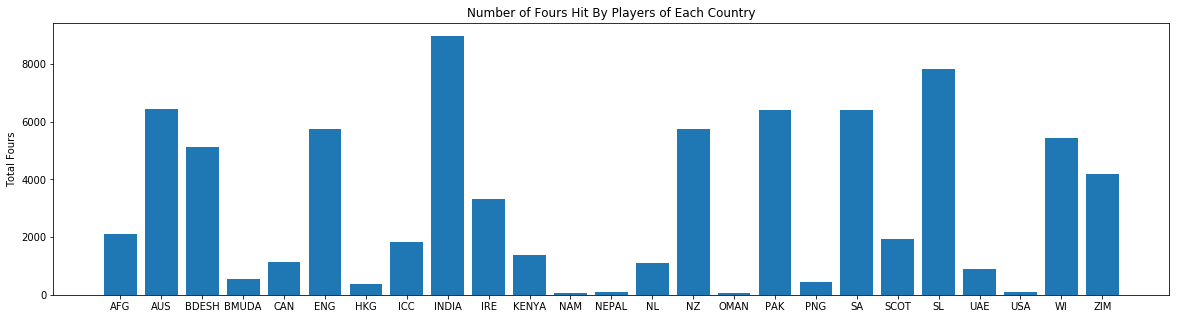

In [34]:
plt.figure(figsize=(20,5))
Total_Fours=country_batting_data['Total_Fours']
Total_Runs=country_batting_data['Total_Runs']
Total_Sixes=country_batting_data['Total_Sixes']
Country=country_batting_data['Player_Country']
p1 = plt.bar(Country,Total_Fours)
plt.ylabel('Total Fours')
plt.title('Number of Fours Hit By Players of Each Country')

Number of Sixes scored by Players of each Country

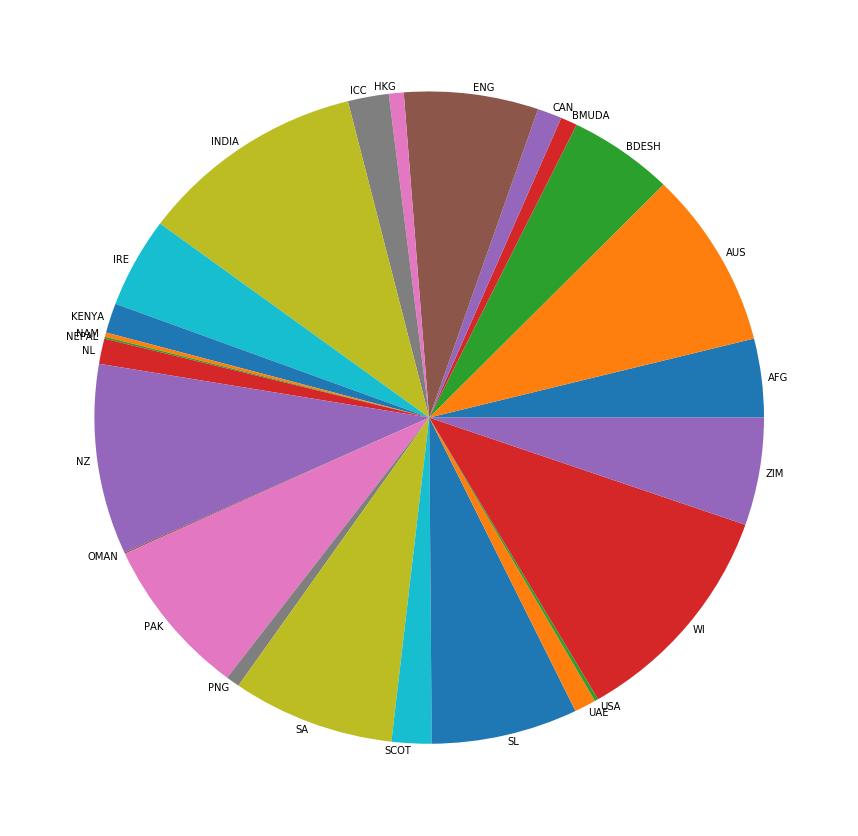

In [35]:
fig = plt.figure(figsize=[15, 15])
ax = fig.add_subplot(111)
ax = ax.pie(Total_Sixes, labels=Country, labeldistance=1.02);

Text(0,0.5,'Strike Rate')

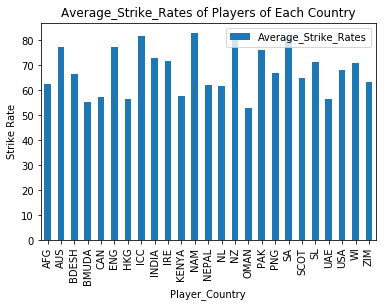

In [36]:
plt4=country_batting_data.plot(x="Player_Country", y="Average_Strike_Rates", kind='bar',title="Average_Strike_Rates of Players of Each Country",width=0.5) 
plt4.set_ylabel("Strike Rate")

Get the Top 20 Batsman across all countries who played atleast 100 matches and is playing till 2019

###### SQL Query:

`select top 20 * from batting_data where Matches>=100 and Played_Till=2019 order by Average desc`

In [37]:
Top_Twenty_Batsman=batting_data[(batting_data.Matches>=100)&(batting_data.Played_Till==2019)].sort_values('Average', ascending=False).head(20).\
reset_index(drop=True)

In [38]:
Top_Twenty_Batsman

,Player_Name,Player_Country,Played_From,Played_Till,Matches,Innings,Not_Outs,Runs_Scored,Highest_Score,Average,Balls_Faced,Strike_Rate,Centuries,Half_Centuries,Duck_Out,Fours,Sixes,Is_Selected
0,V Kohli,INDIA,2008,2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,1095,119,1
1,JE Root,ENG,2013,2019,143,135,21,5856,133,51.36,6702,87.37,16,33,4,475,43,1
2,MS Dhoni,INDIA,2005,2019,347,294,83,10754,183,50.96,12289,87.50,10,73,9,824,228,1
3,HM Amla,SA,2008,2019,181,178,14,8113,159,49.46,9178,88.39,27,39,4,822,53,1
4,RG Sharma,INDIA,2007,2019,221,214,32,8944,264,49.14,10063,88.88,28,43,13,801,238,1
5,KS Williamson,NZ,2010,2019,149,142,14,6132,148,47.90,7494,81.82,13,39,5,559,49,1
6,LRPL Taylor,NZ,2006,2019,228,212,37,8376,181,47.86,10091,83.00,20,50,9,694,140,1
7,F du Plessis,SA,2011,2019,143,136,20,5507,185,47.47,6215,88.60,12,35,3,495,66,1
8,DA Warner,AUS,2009,2019,116,114,5,4990,179,45.77,5222,95.55,17,20,2,520,78,1
9,Q de Kock,SA,2013,2019,115,115,6,4907,178,45.01,5154,95.20,14,24,3,571,69,1


Text(0,0.5,'Average')

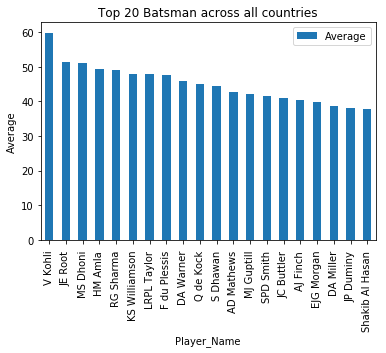

In [39]:
plt5=Top_Twenty_Batsman.plot(x="Player_Name", y="Average", kind='bar',title="Top 20 Batsman across all countries",width=0.5) 
plt5.set_ylabel("Average")

Text(0,0.5,'Wickets Taken')

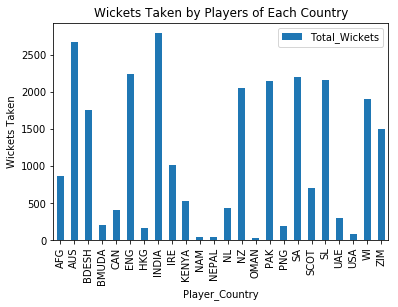

In [40]:
plt5=country_bowling_data.plot(x="Player_Country", y="Total_Wickets", kind='bar',title="Wickets Taken by Players of Each Country",width=0.5) 
plt5.set_ylabel("Wickets Taken")

Text(0,0.5,'Average_Economy_Rate')

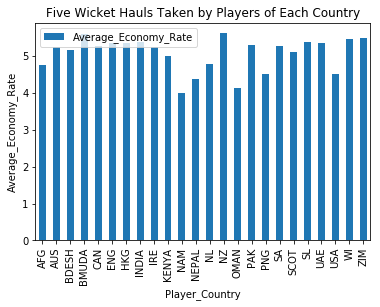

In [41]:
plt6=country_bowling_data.plot(x="Player_Country", y="Average_Economy_Rate", kind='bar',title="Five Wicket Hauls Taken by Players of Each Country",width=0.5) 
plt6.set_ylabel("Average_Economy_Rate")

Text(0,0.5,'Maidens Bowled')

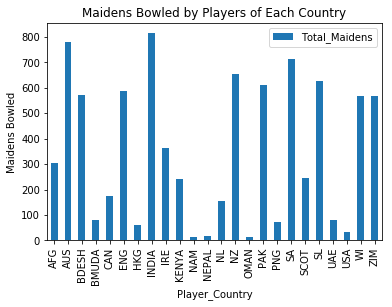

In [42]:
plt6=country_bowling_data.plot(x="Player_Country", y="Total_Maidens", kind='bar',title="Maidens Bowled by Players of Each Country",width=0.5) 
plt6.set_ylabel("Maidens Bowled")

Text(0,0.5,'Number of Four Wickets Hauls')

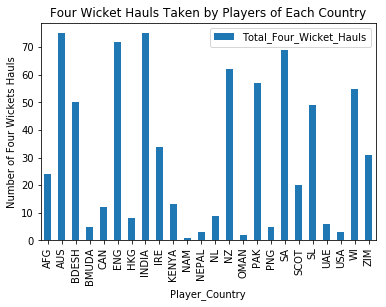

In [43]:
plt7=country_bowling_data.plot(x="Player_Country", y="Total_Four_Wicket_Hauls", kind='bar',title="Four Wicket Hauls Taken by Players of Each Country",width=0.5) 
plt7.set_ylabel("Number of Four Wickets Hauls")

Text(0,0.5,'Number of Five Wickets Hauls')

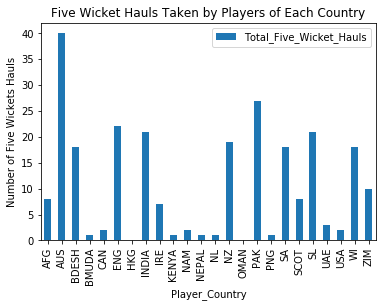

In [44]:
plt8=country_bowling_data.plot(x="Player_Country", y="Total_Five_Wicket_Hauls", kind='bar',title="Five Wicket Hauls Taken by Players of Each Country",width=0.5) 
plt8.set_ylabel("Number of Five Wickets Hauls")

Text(0,0.5,'Average Bowling Strike Rate')

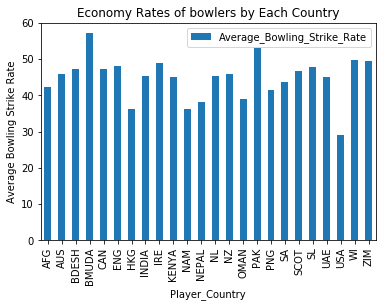

In [45]:
plt10=country_bowling_data.plot(x="Player_Country", y="Average_Bowling_Strike_Rate", kind='bar',title="Economy Rates of bowlers by Each Country",width=0.5) 
plt10.set_ylabel("Average Bowling Strike Rate")

Text(0.5,1,'Economy Rates of bowlers by Each Country')

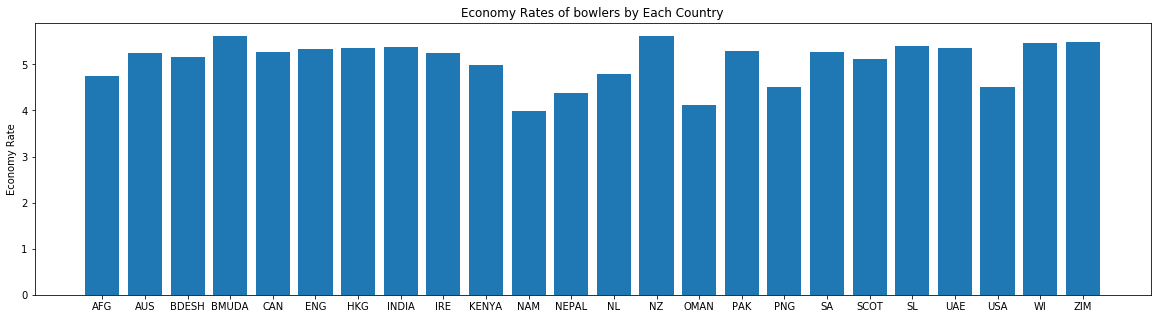

In [46]:
plt.figure(figsize=(20,5))
Average_Bowling_Strike_Rates=country_bowling_data['Average_Economy_Rate']
Country=country_bowling_data['Player_Country']
p1 = plt.bar(Country,Average_Bowling_Strike_Rates)
plt.ylabel('Economy Rate')
plt.title('Economy Rates of bowlers by Each Country')

Get the Top 20 Bowlers who played atleast 50 matches and is playing till 2019

###### SQL Query:

`select top 20 * from bowling_data where Matches>=50 and Played_Till=2019 and Wickets>65 order by Bowling_Average asc`

In [47]:
Top_Twenty_Bowlers=bowling_data[(bowling_data.Matches>=50)&(bowling_data.Played_Till==2019)&(bowling_data.Wickets>65)].sort_values('Bowling_Average').head(20).\
reset_index(drop=True)

In [48]:
Top_Twenty_Bowlers

,Player_Name,Player_Country,Played_From,Played_Till,Matches,Innings,Overs,Maidens,Runs_Given,Wickets,Bowling_Average,Economy,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,Is_Selected
0,Rashid Khan,AFG,2015,2019,71,67,593.0,26,2467,133,18.54,4.16,26.7,4,4,1
1,MA Starc,AUS,2010,2019,85,85,719.1,39,3611,172,20.99,5.02,25.0,11,7,1
2,JJ Bumrah,INDIA,2016,2019,58,58,501.3,35,2254,103,21.88,4.49,29.2,5,1,1
3,Mustafizur Rahman,BDESH,2015,2019,56,55,468.5,22,2458,107,22.97,5.24,26.2,3,5,1
4,Kuldeep Yadav,INDIA,2017,2019,56,54,492.0,12,2455,99,24.79,4.98,29.8,4,1,1
5,Imran Tahir,SA,2011,2019,107,104,923.3,38,4297,173,24.83,4.65,32.0,7,3,1
6,Mohammed Shami,INDIA,2013,2019,73,72,618.1,39,3400,136,25.00,5.50,27.2,8,1,1
7,TA Boult,NZ,2012,2019,89,89,814.0,58,4111,164,25.06,5.05,29.7,7,5,1
8,DW Steyn,SA,2005,2019,125,124,1042.4,71,5087,196,25.95,4.87,31.9,4,3,1
9,YS Chahal,INDIA,2016,2019,50,49,443.1,12,2246,85,26.42,5.06,31.2,2,2,1


### Featurization

Check how the Is_Selected class label related with Average

In [49]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

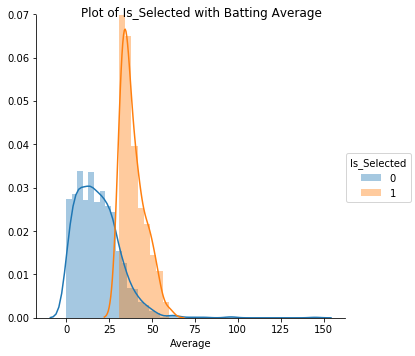

In [50]:
g=sns.FacetGrid(batting_data, hue="Is_Selected", size=5) \
   .map(sns.distplot, "Average") \
   .add_legend();

g.fig.suptitle('Plot of Is_Selected with Batting Average')
plt.show();


We can see that the players whose Average is greater than 30 are having positive class label (1)

In [51]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

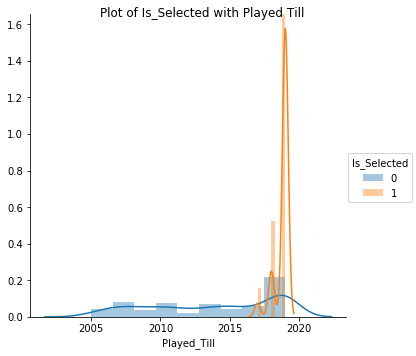

In [52]:
g=sns.FacetGrid(batting_data, hue="Is_Selected", size=5) \
   .map(sns.distplot, "Played_Till") \
   .add_legend();

g.fig.suptitle('Plot of Is_Selected with Played Till')
plt.show();

We can see that the players who are playing from 2017 are having positive class label (1)

In [53]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

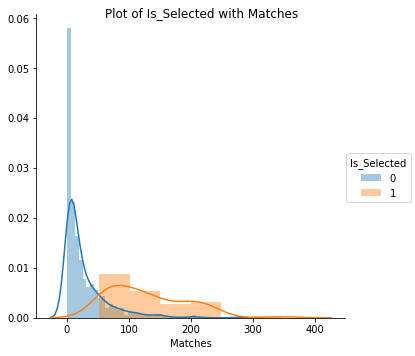

In [54]:
g=sns.FacetGrid(batting_data, hue="Is_Selected", size=5) \
   .map(sns.distplot, "Matches") \
   .add_legend();

g.fig.suptitle('Plot of Is_Selected with Matches')
plt.show();

We can see that the players who played more than 50 matches are having positive class label (1)

So, we can use the above three features `Matches`, `Played_Till`, `Average` to analyse the class label

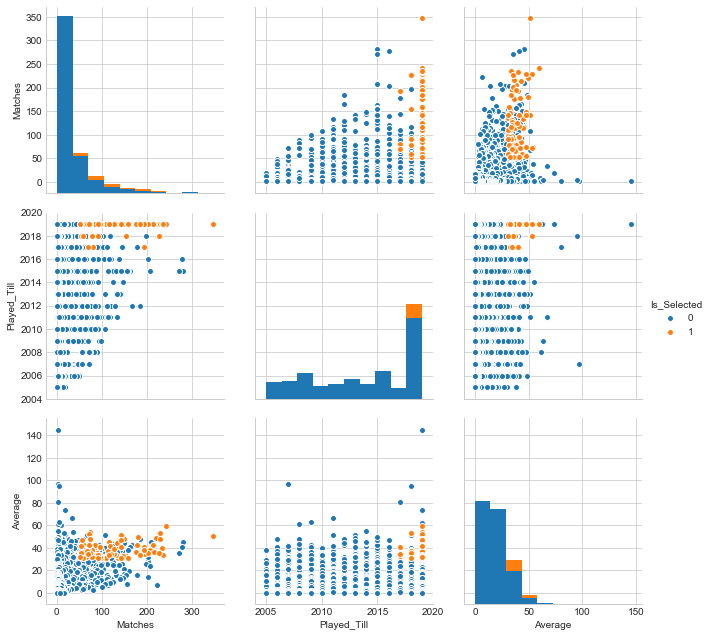

In [55]:
sns.set_style("whitegrid");
sns.pairplot(batting_data, hue="Is_Selected", size=3,vars=['Matches','Played_Till','Average']);
plt.show()

We can filter the data based on above feature values

###### SQL Query:

`select * from batting_data where Matches>=50 and Played_Till in ('2019','2018','2017')`

In [56]:
Batsman_Latest=batting_data[(batting_data.Matches>=50)&(batting_data.Played_Till.isin(['2019','2018','2017']))].reset_index(drop=True)

In [57]:
Batsman_Latest

,Player_Name,Player_Country,Played_From,Played_Till,Matches,Innings,Not_Outs,Runs_Scored,Highest_Score,Average,Balls_Faced,Strike_Rate,Centuries,Half_Centuries,Duck_Out,Fours,Sixes,Is_Selected
0,V Kohli,INDIA,2008,2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,1095,119,1
1,MS Dhoni,INDIA,2005,2019,347,294,83,10754,183,50.96,12289,87.50,10,73,9,824,228,1
2,AB de Villiers,SA,2005,2018,228,218,39,9577,176,53.50,9473,101.09,25,53,7,840,204,1
3,RG Sharma,INDIA,2007,2019,221,214,32,8944,264,49.14,10063,88.88,28,43,13,801,238,1
4,LRPL Taylor,NZ,2006,2019,228,212,37,8376,181,47.86,10091,83.00,20,50,9,694,140,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Junaid Khan,PAK,2011,2019,76,31,17,68,25,4.85,127,53.54,0,0,6,4,1,0
148,MA Wood,ENG,2015,2019,51,17,10,56,13,8.00,63,88.88,0,0,3,6,0,0
149,CB Mpofu,ZIM,2005,2019,80,38,20,46,6,2.55,173,26.58,0,0,6,1,0,0
150,YS Chahal,INDIA,2016,2019,50,8,3,39,18,7.80,72,54.16,0,0,1,6,0,0


In [58]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

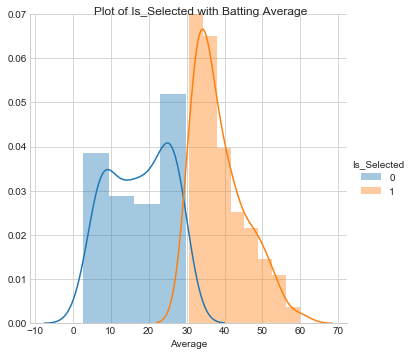

In [59]:
g=sns.FacetGrid(Batsman_Latest, hue="Is_Selected", size=5) \
   .map(sns.distplot, "Average") \
   .add_legend();

g.fig.suptitle('Plot of Is_Selected with Batting Average')
plt.show();

After filtering the data with the above found features, we can see a clear separation of class labels with Average at 30

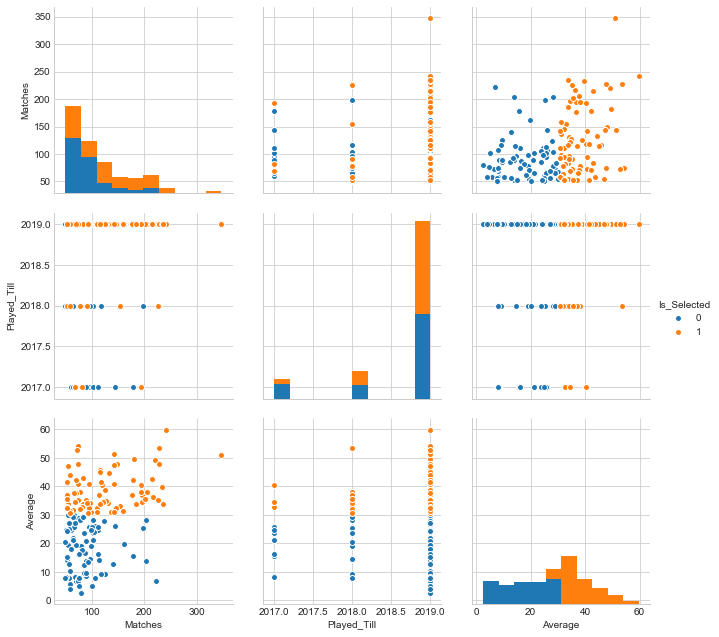

In [60]:
sns.set_style("whitegrid");
sns.pairplot(Batsman_Latest, hue="Is_Selected", size=3,vars=['Matches','Played_Till','Average']);
plt.show()

By observing the above pairplots, we can clearly classify the output class label

Now Lets see the features for `Bowling Data`

In [61]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

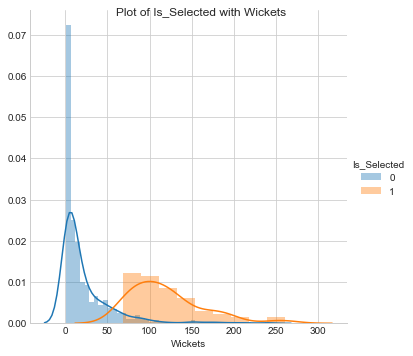

In [62]:
g=sns.FacetGrid(bowling_data, hue="Is_Selected", size=5) \
   .map(sns.distplot, "Wickets") \
   .add_legend();

g.fig.suptitle('Plot of Is_Selected with Wickets')
plt.show();

We can see that the bowlers who took more than 60 wickets are having positive class (1)

In [63]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

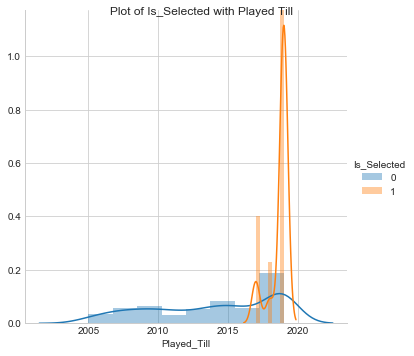

In [64]:
g=sns.FacetGrid(bowling_data, hue="Is_Selected", size=5) \
   .map(sns.distplot, "Played_Till") \
   .add_legend();

g.fig.suptitle('Plot of Is_Selected with Played Till')
plt.show();

We can see that the players who are playing since 2017 are having positive class (1)

In [65]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

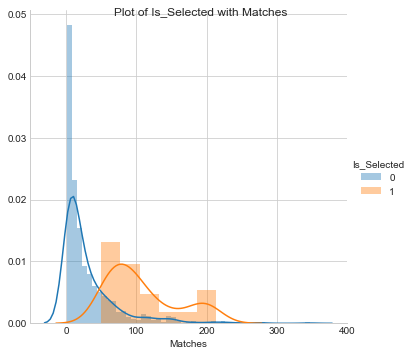

In [66]:
g=sns.FacetGrid(bowling_data, hue="Is_Selected", size=5) \
   .map(sns.distplot, "Matches") \
   .add_legend();

g.fig.suptitle('Plot of Is_Selected with Matches')
plt.show();

We can see players who played atleast 50 matches are having positive class label (1)

So, we can use the above three features `Matches`, `Played_Till`, `Wickets` to analyse the class label

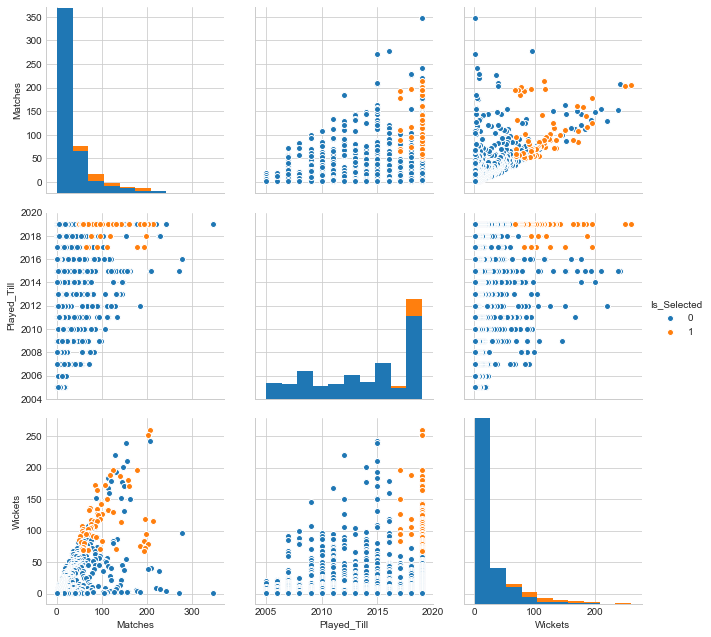

In [67]:
sns.set_style("whitegrid");
sns.pairplot(bowling_data, hue="Is_Selected", size=3,vars=['Matches','Played_Till','Wickets']);
plt.show()

We can filter the data based on above feature values

###### SQL Query:

`select * from bowling_data where Matches>=50 and Played_Till in ('2019','2018','2017')`

In [68]:
Bowlers_Latest=bowling_data[(bowling_data.Matches>=50)&(bowling_data.Played_Till.isin(['2019','2018','2017']))].reset_index(drop=True)

In [69]:
Bowlers_Latest

,Player_Name,Player_Country,Played_From,Played_Till,Matches,Innings,Overs,Maidens,Runs_Given,Wickets,Bowling_Average,Economy,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,Is_Selected
0,Shakib Al Hasan,BDESH,2006,2019,206,203,1752.5,83,7857,260,30.21,4.48,40.4,8,2,1
1,Mashrafe Mortaza,BDESH,2005,2019,203,203,1680.5,112,8143,251,32.44,4.84,40.1,7,1,1
2,KMDN Kulasekara,SL,2006,2017,178,175,1337.1,101,6595,196,33.64,4.93,40.9,4,1,1
3,DW Steyn,SA,2005,2019,125,124,1042.4,71,5087,196,25.95,4.87,31.9,4,3,1
4,M Morkel,SA,2007,2018,117,114,960.0,47,4761,188,25.32,4.95,30.6,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,A Balbirnie,IRE,2010,2019,64,3,10.0,0,68,2,34.00,6.80,30.0,0,0,0
106,F du Plessis,SA,2011,2019,143,11,32.0,0,189,2,94.50,5.90,96.0,0,0,0
107,CK Kapugedera,SL,2006,2017,102,10,44.0,0,225,2,112.50,5.11,132.0,0,0,0
108,KJ Coetzer,SCOT,2008,2019,59,7,29.5,1,203,1,203.00,6.80,179.0,0,0,0


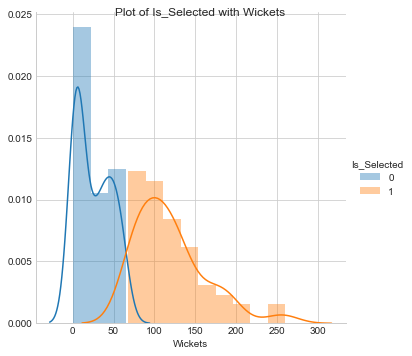

In [70]:
g=sns.FacetGrid(Bowlers_Latest, hue="Is_Selected", size=5) \
   .map(sns.distplot, "Wickets") \
   .add_legend();

g.fig.suptitle('Plot of Is_Selected with Wickets')
plt.show();

After filtering the data with the above found features, we can see a clear separation of class labels with Wickets at 50

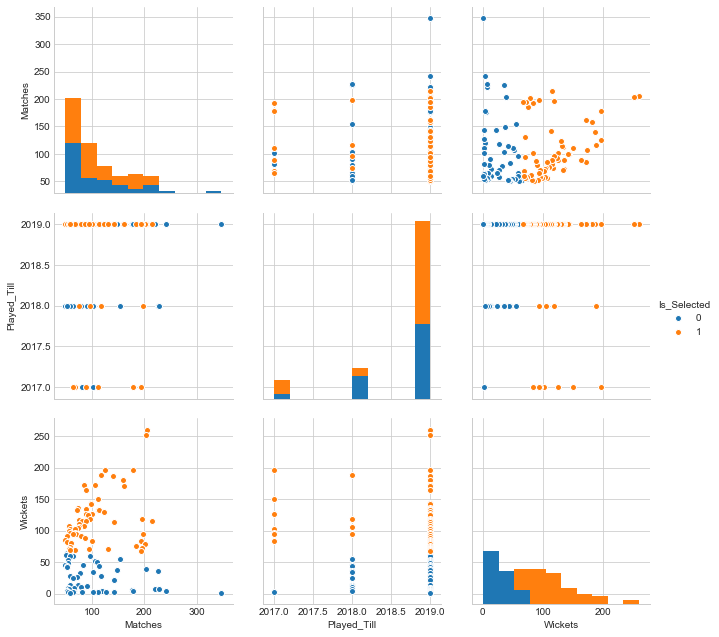

In [71]:
sns.set_style("whitegrid");
sns.pairplot(Bowlers_Latest, hue="Is_Selected", size=3,vars=['Matches','Played_Till','Wickets']);
plt.show()

By observing the above pairplots, we can clearly classify the output class label

### Modeling

We can use classfication models like 

Logistic Regression

K-Nearest Neighbor 

Naive Bayes

Support Vector Machine

Random Forest

We use the above models and check which model is giving us better results

### Now Let's Build Models on Batting Data

In [72]:
Batsman_Latest

,Player_Name,Player_Country,Played_From,Played_Till,Matches,Innings,Not_Outs,Runs_Scored,Highest_Score,Average,Balls_Faced,Strike_Rate,Centuries,Half_Centuries,Duck_Out,Fours,Sixes,Is_Selected
0,V Kohli,INDIA,2008,2019,242,233,39,11609,183,59.84,12445,93.28,43,55,13,1095,119,1
1,MS Dhoni,INDIA,2005,2019,347,294,83,10754,183,50.96,12289,87.50,10,73,9,824,228,1
2,AB de Villiers,SA,2005,2018,228,218,39,9577,176,53.50,9473,101.09,25,53,7,840,204,1
3,RG Sharma,INDIA,2007,2019,221,214,32,8944,264,49.14,10063,88.88,28,43,13,801,238,1
4,LRPL Taylor,NZ,2006,2019,228,212,37,8376,181,47.86,10091,83.00,20,50,9,694,140,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Junaid Khan,PAK,2011,2019,76,31,17,68,25,4.85,127,53.54,0,0,6,4,1,0
148,MA Wood,ENG,2015,2019,51,17,10,56,13,8.00,63,88.88,0,0,3,6,0,0
149,CB Mpofu,ZIM,2005,2019,80,38,20,46,6,2.55,173,26.58,0,0,6,1,0,0
150,YS Chahal,INDIA,2016,2019,50,8,3,39,18,7.80,72,54.16,0,0,1,6,0,0


In [73]:
Y_Bat=batting_data['Is_Selected']
batting_data.drop(['Player_Name','Player_Country','Played_From','Innings','Not_Outs','Duck_Out','Is_Selected'], axis=1, inplace=True)

In [74]:
print(batting_data.shape)
Y_Bat.shape

(1306, 11)


(1306,)

In [75]:
from sklearn.model_selection import train_test_split

X_train_bat,X_test_bat, y_train_bat, y_test_bat = train_test_split(batting_data,Y_Bat,test_size=0.2)
X_train_bat, X_cv_bat, y_train_bat, y_cv_bat = train_test_split(X_train_bat, y_train_bat, test_size=0.2) 

In [76]:
print("Number of data points in train data :",X_train_bat.shape)
print("Number of data points in CV data :",X_cv_bat.shape)
print("Number of data points in test data :",X_test_bat.shape)

Number of data points in train data : (835, 11)
Number of data points in CV data : (209, 11)
Number of data points in test data : (262, 11)


In [77]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Logistic Regression

Tune to get the best HyperParameter Value

For values of alpha =  0.0001 ,The log loss is: 0.3537812744748513
For values of alpha =  0.001 ,The log loss is: 0.347013017385422
For values of alpha =  0.01 ,The log loss is: 0.35444320803681184
For values of alpha =  0.1 ,The log loss is: 0.3564065851104026
For values of alpha =  1 ,The log loss is: 0.35867899976506906
For values of alpha =  10 ,The log loss is: 0.3588866389397202
For values of alpha =  100 ,The log loss is: 0.3588791262805762
For values of alpha =  1000 ,The log loss is: 0.35889378448099557

Value of best Hyper Parameter is 0.001


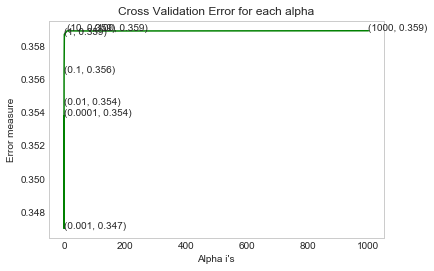

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

train_auc = []
cv_auc = []
log_error_array=[]

alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    clf = LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    clf.fit(X_train_bat, y_train_bat)
        
    y_train_pred=clf.predict_proba(X_train_bat)[:,1]
    y_cv_pred=clf.predict_proba(X_cv_bat)[:,1]

    train_auc.append(roc_auc_score(y_train_bat,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv_bat, y_cv_pred))
    y_test_pred = clf.predict_proba(X_test_bat)
    log_error_array.append(log_loss(y_test_bat, y_test_pred, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, ",The log loss is:",log_loss(y_test_bat, y_test_pred, labels=clf.classes_, eps=1e-15))

best_alpha = np.argmin(log_error_array)
best_alpha_value=alpha[best_alpha]

print("\nValue of best Hyper Parameter is",best_alpha_value)

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

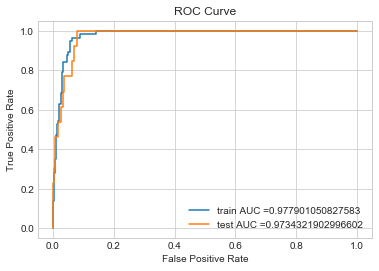

the maximum value of tpr*(1-fpr) 0.9041401704776079 for threshold 0.517
Train confusion matrix
[[729  49]
 [  2  55]]
Test confusion matrix
[[224  25]
 [  0  13]]


In [79]:
clf = LogisticRegression(C=best_alpha_value,penalty='l2',class_weight='balanced')
clf.fit(X_train_bat, y_train_bat)

y_train_pred = clf.predict(X_train_bat)   
y_test_pred = clf.predict(X_test_bat)   

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_bat, clf.predict_proba(X_train_bat)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_bat, clf.predict_proba(X_test_bat)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_bat, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test_bat, predict_with_best_t(y_test_pred, best_t)))

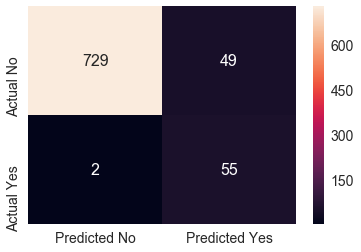

In [80]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train_bat, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

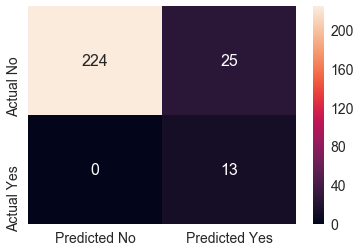

In [81]:
df_cm = pd.DataFrame(confusion_matrix(y_test_bat, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Lets Test with a Query Point for Logistic Regression

In [82]:
X_Query_Point_Pos=[2019,120,9564,102,42,11000,84.5,29,50,250,125]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the Logistic Regression classifier is',y_train_pred_Query_p)

Predicted Value by the Logistic Regression classifier is [1]


In [83]:
X_Query_Point_Neg=[2010,15,800,20,12,1000,44.5,0,0,6,3]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the Logistic Regression classifier is',y_train_pred_Query_n)

Predicted Value by the Logistic Regression classifier is [0]


### K Nearest Neighbor

For values of K =  1 ,The auc score is: 1.0
For values of K =  5 ,The auc score is: 0.9819713164659721
For values of K =  10 ,The auc score is: 0.9787804988048527
For values of K =  15 ,The auc score is: 0.9782731249718126
For values of K =  21 ,The auc score is: 0.978927073467731
For values of K =  31 ,The auc score is: 0.9768186533170973
For values of K =  41 ,The auc score is: 0.9741464844630857

Value of best Hyper Parameter is 1


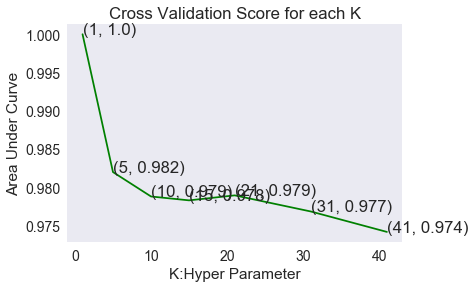

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

K = [1, 5, 10, 15, 21, 31, 41]

for i in K:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_bat, y_train_bat)
        
    y_train_pred=clf.predict_proba(X_train_bat)[:,1]
    y_cv_pred=clf.predict_proba(X_cv_bat)[:,1]

    train_auc.append(roc_auc_score(y_train_bat,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv_bat, y_cv_pred))
    print('For values of K = ', i, ",The auc score is:",roc_auc_score(y_train_bat,y_train_pred))

best_k = np.argmax(train_auc)
best_k_value=K[best_k]

print("\nValue of best Hyper Parameter is",best_k_value)

fig, ax = plt.subplots()
ax.plot(K, train_auc,c='g')
for i, txt in enumerate(np.round(train_auc,3)):
    ax.annotate((K[i],np.round(txt,3)), (K[i],train_auc[i]))
plt.title("Cross Validation Score for each K")
plt.xlabel("K:Hyper Parameter")
plt.ylabel("Area Under Curve")
plt.grid()
plt.show()

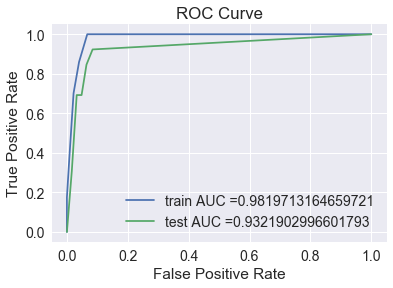

the maximum value of tpr*(1-fpr) 0.9331619537275064 for threshold 0.2
Train confusion matrix
[[761  17]
 [ 17  40]]
Test confusion matrix
[[237  12]
 [  4   9]]


In [85]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_bat, y_train_bat)

y_train_pred = clf.predict(X_train_bat)   
y_test_pred = clf.predict(X_test_bat)   

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_bat, clf.predict_proba(X_train_bat)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_bat, clf.predict_proba(X_test_bat)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_bat, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test_bat, predict_with_best_t(y_test_pred, best_t)))

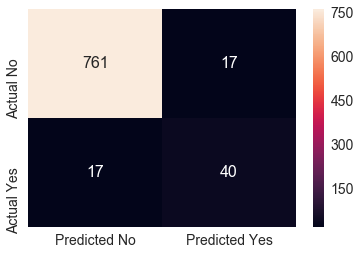

In [86]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train_bat, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

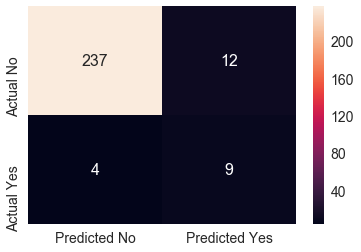

In [87]:
df_cm = pd.DataFrame(confusion_matrix(y_test_bat, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Lets Test with a Query Point for KNN Classifier

In [88]:
X_Query_Point_Pos=[2019,120,9564,102,42,11000,84.5,29,50,250,125]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the KNN Classifier is',y_train_pred_Query_p)

Predicted Value by the KNN Classifier is [1]


In [89]:
X_Query_Point_Neg=[2010,15,800,20,12,1000,44.5,0,0,6,3]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the KNN Classifier is',y_train_pred_Query_n)

Predicted Value by the KNN Classifier is [0]


### Naive Bayes

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    clf = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    clf.fit(X_train_bat, y_train_bat)
        
    y_train_pred=clf.predict_proba(X_train_bat)[:,1]
    y_cv_pred=clf.predict_proba(X_cv_bat)[:,1]

    train_auc.append(roc_auc_score(y_train_bat,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv_bat, y_cv_pred))

    print('For values of alpha = ', i, ",The auc score is:",roc_auc_score(y_train_bat,y_train_pred))


best_alpha = np.argmax(train_auc)
best_alpha_value=alpha[best_alpha]

print("\nValue of best Hyper Parameter is",best_alpha_value)

For values of alpha =  0.0001 ,The auc score is: 0.9383258918504488
For values of alpha =  0.001 ,The auc score is: 0.9383258918504488
For values of alpha =  0.01 ,The auc score is: 0.9383258918504488
For values of alpha =  0.1 ,The auc score is: 0.9383258918504488
For values of alpha =  1 ,The auc score is: 0.9383258918504488
For values of alpha =  10 ,The auc score is: 0.9383258918504488
For values of alpha =  100 ,The auc score is: 0.9383258918504488
For values of alpha =  1000 ,The auc score is: 0.9383484417985839

Value of best Hyper Parameter is 1000


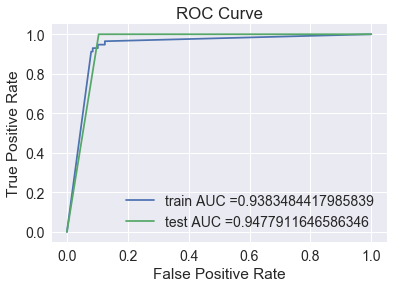

the maximum value of tpr*(1-fpr) 0.8511703423082126 for threshold 0.0
Train confusion matrix
[[716  62]
 [  5  52]]
Test confusion matrix
[[223  26]
 [  0  13]]


In [91]:
clf = MultinomialNB(alpha=best_alpha_value,class_prior=[0.5,0.5])
clf.fit(X_train_bat, y_train_bat)

y_train_pred = clf.predict(X_train_bat)   
y_test_pred = clf.predict(X_test_bat)   

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_bat, clf.predict_proba(X_train_bat)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_bat, clf.predict_proba(X_test_bat)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_bat, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test_bat, predict_with_best_t(y_test_pred, best_t)))

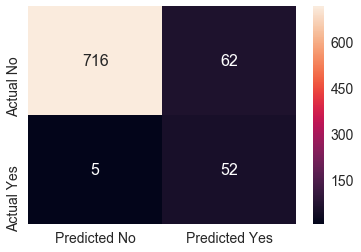

In [92]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train_bat, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

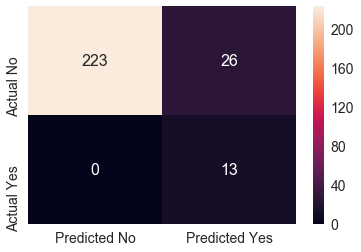

In [93]:
df_cm = pd.DataFrame(confusion_matrix(y_test_bat, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Lets Test with a Query Point for Naive Bayes

In [94]:
X_Query_Point_Pos=[2019,120,9564,102,42,11000,84.5,29,50,250,125]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the Naive Bayes classifier is',y_train_pred_Query_p)

Predicted Value by the Naive Bayes classifier is [1]


In [95]:
X_Query_Point_Neg=[2010,15,800,20,12,1000,44.5,0,0,6,3]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the Naive Bayes classifier is',y_train_pred_Query_n)

Predicted Value by the Naive Bayes classifier is [0]


### Support Vector Machine


Value of best Hyper Parameter is 1


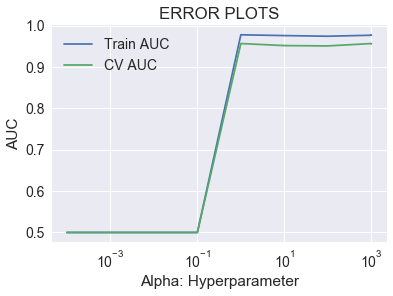

In [96]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc = []
cv_auc = []
log_error_array=[]

alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,1000]
for i in alpha:
    clf = SGDClassifier(loss='hinge',penalty='l2',alpha=i,class_weight='balanced')
    clf.fit(X_train_bat,y_train_bat)
    
    calibrated = CalibratedClassifierCV(clf,method='sigmoid',cv='prefit')
    calibrated.fit(X_train_bat,y_train_bat)
    
    y_train_pred=calibrated.predict_proba(X_train_bat)[:,1]
    y_cv_pred=calibrated.predict_proba(X_cv_bat)[:,1]

    train_auc.append(roc_auc_score(y_train_bat,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv_bat, y_cv_pred))

best_alpha = np.argmax(train_auc)
best_alpha_value=alpha[best_alpha]

print("\nValue of best Hyper Parameter is",best_alpha_value)
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')
plt.xscale('log')
plt.legend()
plt.xlabel("Alpha: Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

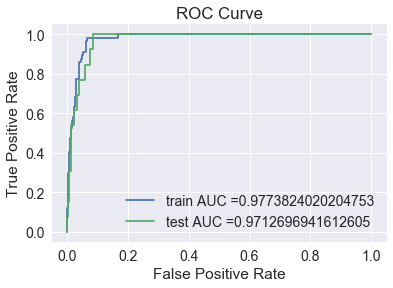

the maximum value of tpr*(1-fpr) 0.9180534884769764 for threshold 0.064
Train confusion matrix
[[727  51]
 [  1  56]]
Test confusion matrix
[[225  24]
 [  0  13]]


In [97]:
from sklearn.metrics import roc_curve, auc

clf = SGDClassifier(loss='hinge',alpha=10,penalty='l2',class_weight='balanced')
clf.fit(X_train_bat, y_train_bat)

calibrated = CalibratedClassifierCV(clf,method='sigmoid',cv='prefit')
calibrated.fit(X_train_bat,y_train_bat)

y_train_pred = calibrated.predict_proba(X_train_bat)[:,1] 
y_test_pred = calibrated.predict_proba(X_test_bat)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_bat, calibrated.predict_proba(X_train_bat)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_bat, calibrated.predict_proba(X_test_bat)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_bat, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test_bat, predict_with_best_t(y_test_pred, best_t)))

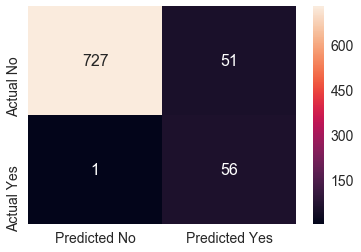

In [98]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train_bat, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

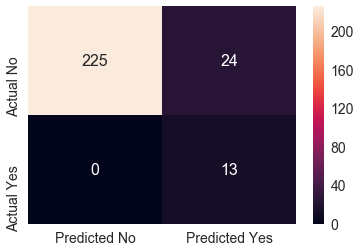

In [99]:
df_cm = pd.DataFrame(confusion_matrix(y_test_bat, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Lets Test with a Query Point for Support Vector Machine

In [100]:
X_Query_Point_Pos=[2019,120,9564,102,42,11000,84.5,29,50,250,125]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the SVM classifier is',y_train_pred_Query_p)

Predicted Value by the SVM classifier is [1]


In [101]:
X_Query_Point_Neg=[2010,15,800,20,12,1000,44.5,0,0,6,3]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the SVM classifier is',y_train_pred_Query_n)

Predicted Value by the SVM classifier is [0]


### Random Forest

Estimators =  10 Train Score 0.9824561403508771 test Score 0.9615384615384616
Estimators =  50 Train Score 0.9473684210526316 test Score 0.9615384615384616
Estimators =  100 Train Score 0.956140350877193 test Score 0.9615384615384616
Estimators =  250 Train Score 0.956140350877193 test Score 0.9615384615384616
Estimators =  450 Train Score 0.9473684210526316 test Score 0.9615384615384616


Text(0.5,1,'Estimators vs score at depth of 4')

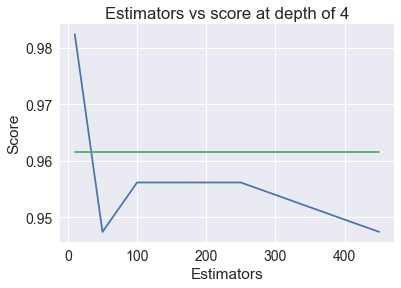

In [102]:
from sklearn.ensemble import RandomForestClassifier

estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_weight_fraction_leaf=0.0, n_estimators=i,verbose=0,warm_start=False)
    clf.fit(X_train_bat,y_train_bat)
    train_sc = roc_auc_score(y_train_bat,clf.predict(X_train_bat))
    test_sc = roc_auc_score(y_test_bat,clf.predict(X_test_bat))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 4')

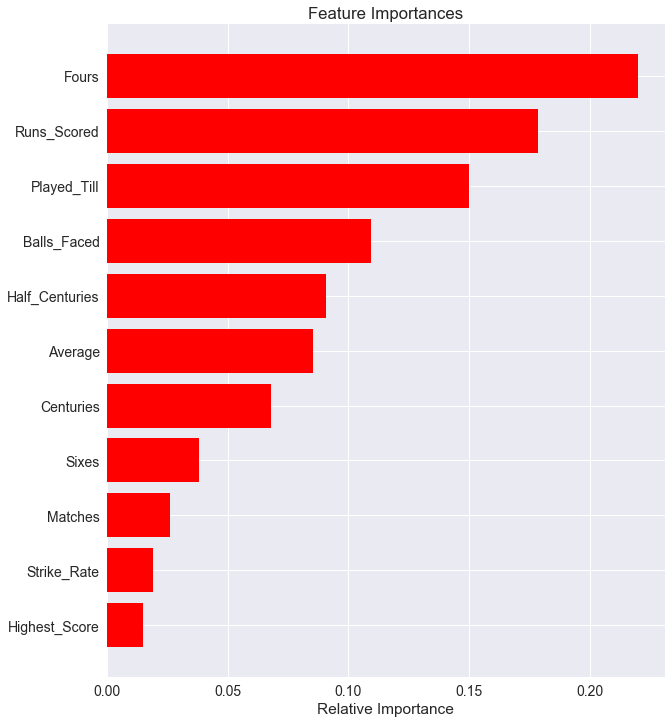

In [103]:
features = batting_data.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Lets Test with a Query Point for Random Forest

In [104]:
X_Query_Point_Pos=[2019,120,9564,102,42,11000,84.5,29,50,250,125]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the Random Forest classifier is',y_train_pred_Query_p)

Predicted Value by the Random Forest classifier is [1]


In [105]:
X_Query_Point_Neg=[2010,15,800,20,12,1000,44.5,0,0,6,3]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the Random Forest classifier is',y_train_pred_Query_n)

Predicted Value by the Random Forest classifier is [0]


### Now Let's Build Models for Bowling Data

In [106]:
bowling_data

,Player_Name,Player_Country,Played_From,Played_Till,Matches,Innings,Overs,Maidens,Runs_Given,Wickets,Bowling_Average,Economy,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,Is_Selected
0,Shakib Al Hasan,BDESH,2006,2019,206,203,1752.5,83,7857,260,30.21,4.48,40.4,8,2,1
1,Mashrafe Mortaza,BDESH,2005,2019,203,203,1680.5,112,8143,251,32.44,4.84,40.1,7,1,1
2,Shahid Afridi,PAK,2005,2015,207,201,1729.4,33,8035,242,33.20,4.64,42.8,3,7,0
3,MG Johnson,AUS,2005,2015,153,150,1248.1,74,6038,239,25.26,4.83,31.3,9,3,0
4,B Lee,AUS,2005,2012,130,129,1101.3,81,5263,220,23.92,4.77,30.0,8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,CG Williams,NAM,2019,2019,5,4,21.0,0,91,1,91.00,4.33,126.0,0,0,0
899,JW Wilson,NZ,2005,2005,2,2,15.0,0,125,1,125.00,8.33,90.0,0,0,0
900,DJ Worrall,AUS,2016,2016,3,3,26.2,0,171,1,171.00,6.49,158.0,0,0,0
901,J Yadav,INDIA,2016,2016,1,1,4.0,0,8,1,8.00,2.00,24.0,0,0,0


In [107]:
Y_Bowl=bowling_data['Is_Selected']
bowling_data.drop(['Player_Name','Player_Country','Played_From','Innings','Runs_Given','Is_Selected'], axis=1, inplace=True)

In [108]:
print(bowling_data.shape)
Y_Bowl.shape

(902, 10)


(902,)

In [109]:
from sklearn.model_selection import train_test_split

X_train_bowl,X_test_bowl, y_train_bowl, y_test_bowl = train_test_split(bowling_data,Y_Bowl,test_size=0.2)
X_train_bowl, X_cv_bowl, y_train_bowl, y_cv_bowl = train_test_split(X_train_bowl, y_train_bowl, test_size=0.2) 

In [110]:
print("Number of data points in train data :",X_train_bowl.shape)
print("Number of data points in CV data :",X_cv_bowl.shape)
print("Number of data points in test data :",X_test_bowl.shape)

Number of data points in train data : (576, 10)
Number of data points in CV data : (145, 10)
Number of data points in test data : (181, 10)


### Logistic Regression

Tune to get the best HyperParameter Value

For values of alpha =  0.0001 ,The log loss is: 0.44034607359268496
For values of alpha =  0.001 ,The log loss is: 0.44774109507542964
For values of alpha =  0.01 ,The log loss is: 0.4658448840345075
For values of alpha =  0.1 ,The log loss is: 0.4947074775045295
For values of alpha =  1 ,The log loss is: 0.5085079287056263
For values of alpha =  10 ,The log loss is: 0.5100320130040998
For values of alpha =  100 ,The log loss is: 0.5096692413920616
For values of alpha =  1000 ,The log loss is: 0.5110625050040631

Value of best Hyper Parameter is 0.0001


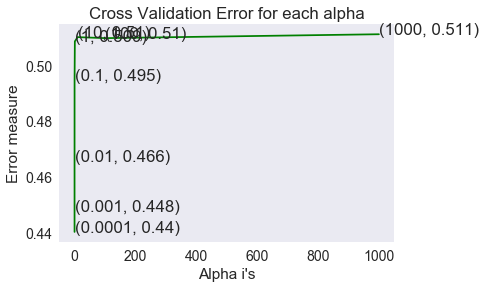

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

train_auc = []
cv_auc = []
log_error_array=[]

alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    clf = LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    clf.fit(X_train_bowl, y_train_bowl)
        
    y_train_pred=clf.predict_proba(X_train_bowl)[:,1]
    y_cv_pred=clf.predict_proba(X_cv_bowl)[:,1]

    train_auc.append(roc_auc_score(y_train_bowl,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv_bowl, y_cv_pred))
    y_test_pred = clf.predict_proba(X_test_bowl)
    log_error_array.append(log_loss(y_test_bowl, y_test_pred, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, ",The log loss is:",log_loss(y_test_bowl, y_test_pred, labels=clf.classes_, eps=1e-15))

best_alpha = np.argmin(log_error_array)
best_alpha_value=alpha[best_alpha]

print("\nValue of best Hyper Parameter is",best_alpha_value)

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


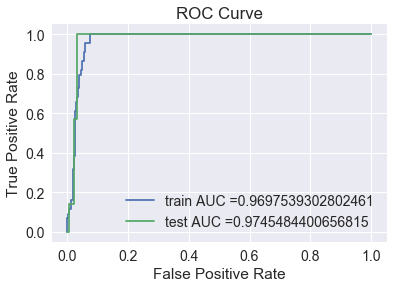

the maximum value of tpr*(1-fpr) 0.9229323308270677 for threshold 0.508
Train confusion matrix
[[490  42]
 [  0  44]]
Test confusion matrix
[[155  19]
 [  0   7]]


In [112]:
clf = LogisticRegression(C=best_alpha_value,penalty='l2',class_weight='balanced')
clf.fit(X_train_bowl, y_train_bowl)

y_train_pred = clf.predict(X_train_bowl)   
y_test_pred = clf.predict(X_test_bowl)   

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_bowl, clf.predict_proba(X_train_bowl)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_bowl, clf.predict_proba(X_test_bowl)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_bowl, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test_bowl, predict_with_best_t(y_test_pred, best_t)))

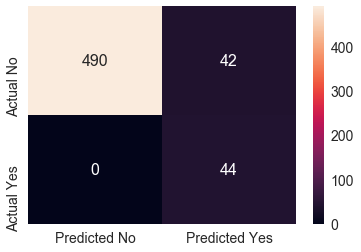

In [113]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train_bowl, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

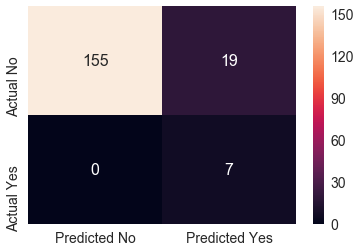

In [114]:
df_cm = pd.DataFrame(confusion_matrix(y_test_bowl, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Lets Test with a Query Point for Logistic Regression

In [115]:
X_Query_Point_Pos=[2019,120,1500,50,250,24.5,4.45,30.3,7,3]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the Logistic Regression classifier is',y_train_pred_Query_p)

Predicted Value by the Logistic Regression classifier is [1]


In [116]:
X_Query_Point_Neg=[2014,40,100,2,45,44.5,6.45,50.3,0,0]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the Logistic Regression classifier is',y_train_pred_Query_n)

Predicted Value by the Logistic Regression classifier is [0]


### K Nearest Neighbor

For values of K =  1 ,The auc score is: 1.0
For values of K =  5 ,The auc score is: 0.9815447710184553
For values of K =  10 ,The auc score is: 0.9782552973342447
For values of K =  15 ,The auc score is: 0.9782125768967874
For values of K =  21 ,The auc score is: 0.9709928229665072
For values of K =  31 ,The auc score is: 0.9700956937799043
For values of K =  41 ,The auc score is: 0.9662935748462064

Value of best Hyper Parameter is 1


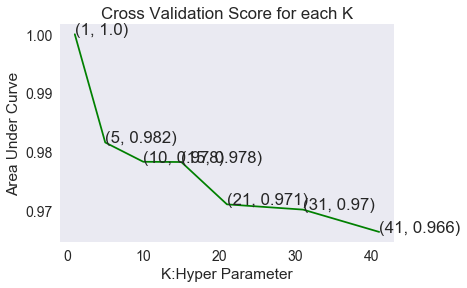

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

K = [1, 5, 10, 15, 21, 31, 41]

for i in K:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_bowl, y_train_bowl)
        
    y_train_pred=clf.predict_proba(X_train_bowl)[:,1]
    y_cv_pred=clf.predict_proba(X_cv_bowl)[:,1]

    train_auc.append(roc_auc_score(y_train_bowl,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv_bowl, y_cv_pred))
    print('For values of K = ', i, ",The auc score is:",roc_auc_score(y_train_bowl,y_train_pred))

best_k = np.argmax(train_auc)
best_k_value=K[best_k]

print("\nValue of best Hyper Parameter is",best_k_value)

fig, ax = plt.subplots()
ax.plot(K, train_auc,c='g')
for i, txt in enumerate(np.round(train_auc,3)):
    ax.annotate((K[i],np.round(txt,3)), (K[i],train_auc[i]))
plt.grid()
plt.title("Cross Validation Score for each K")
plt.xlabel("K:Hyper Parameter")
plt.ylabel("Area Under Curve")
plt.show()


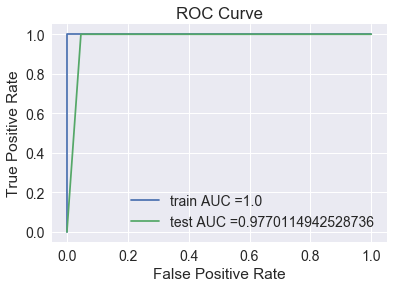

the maximum value of tpr*(1-fpr) 1.0 for threshold 1.0
Train confusion matrix
[[532   0]
 [  0  44]]
Test confusion matrix
[[166   8]
 [  0   7]]


In [118]:
clf = KNeighborsClassifier(n_neighbors=best_k_value)
clf.fit(X_train_bowl, y_train_bowl)

y_train_pred = clf.predict(X_train_bowl)   
y_test_pred = clf.predict(X_test_bowl)   

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_bowl, clf.predict_proba(X_train_bowl)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_bowl, clf.predict_proba(X_test_bowl)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_bowl, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test_bowl, predict_with_best_t(y_test_pred, best_t)))

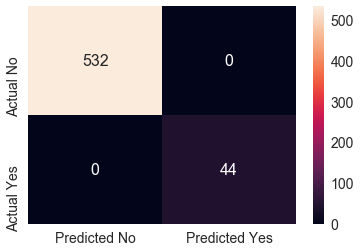

In [119]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train_bowl, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

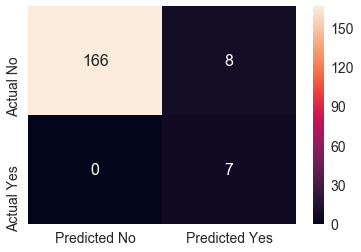

In [120]:
df_cm = pd.DataFrame(confusion_matrix(y_test_bowl, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Lets Test with a Query Point for KNN Classifier

In [121]:
X_Query_Point_Pos=[2019,120,1500,50,250,24.5,4.45,30.3,7,3]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the KNN Classifier is',y_train_pred_Query_p)

Predicted Value by the KNN Classifier is [1]


In [122]:
X_Query_Point_Neg=[2014,40,100,2,45,44.5,6.45,50.3,0,0]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the KNN Classifier is',y_train_pred_Query_n)

Predicted Value by the KNN Classifier is [0]


### Naive Bayes

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in alpha:
    clf = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    clf.fit(X_train_bowl, y_train_bowl)
        
    y_train_pred=clf.predict_proba(X_train_bowl)[:,1]
    y_cv_pred=clf.predict_proba(X_cv_bowl)[:,1]

    train_auc.append(roc_auc_score(y_train_bowl,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv_bowl, y_cv_pred))

    print('For values of alpha = ', i, ",The auc score is:",roc_auc_score(y_train_bowl,y_train_pred))


best_alpha = np.argmax(train_auc)
best_alpha_value=alpha[best_alpha]

print("\nValue of best Hyper Parameter is",best_alpha_value)

For values of alpha =  0.0001 ,The auc score is: 0.9473684210526316
For values of alpha =  0.001 ,The auc score is: 0.9473684210526316
For values of alpha =  0.01 ,The auc score is: 0.9473684210526316
For values of alpha =  0.1 ,The auc score is: 0.9473684210526316
For values of alpha =  1 ,The auc score is: 0.9473684210526316
For values of alpha =  10 ,The auc score is: 0.9473684210526316
For values of alpha =  100 ,The auc score is: 0.9473684210526316
For values of alpha =  1000 ,The auc score is: 0.9576213260423787

Value of best Hyper Parameter is 1000


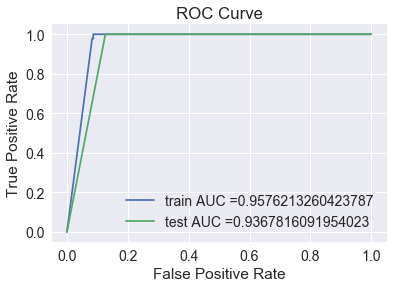

the maximum value of tpr*(1-fpr) 0.9135338345864662 for threshold 0.991
Train confusion matrix
[[484  48]
 [  0  44]]
Test confusion matrix
[[150  24]
 [  0   7]]


In [124]:
clf = MultinomialNB(alpha=best_alpha_value,class_prior=[0.5,0.5])
clf.fit(X_train_bowl, y_train_bowl)

y_train_pred = clf.predict(X_train_bowl)   
y_test_pred = clf.predict(X_test_bowl)   

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_bowl, clf.predict_proba(X_train_bowl)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_bowl, clf.predict_proba(X_test_bowl)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_bowl, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test_bowl, predict_with_best_t(y_test_pred, best_t)))

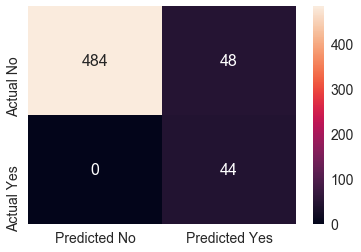

In [125]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train_bowl, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

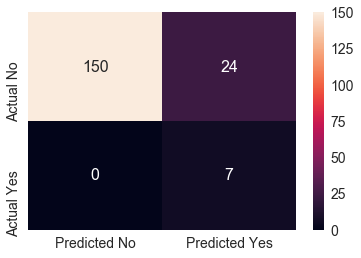

In [126]:
df_cm = pd.DataFrame(confusion_matrix(y_test_bowl, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Lets Test with a Query Point for Naive Bayes

In [127]:
X_Query_Point_Pos=[2019,120,1500,50,250,24.5,4.45,30.3,7,3]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
y_train_pred_Query_p
print('Predicted Value by the Naive Bayes classifier is',y_train_pred_Query_p)

Predicted Value by the Naive Bayes classifier is [1]


In [128]:
X_Query_Point_Neg=[2014,40,100,2,45,44.5,6.45,50.3,0,0]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
y_train_pred_Query_n
print('Predicted Value by the Naive Bayes classifier is',y_train_pred_Query_n)

Predicted Value by the Naive Bayes classifier is [0]


### Support Vector Machine


Value of best Hyper Parameter is 1


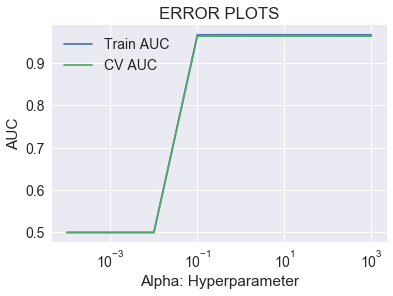

In [129]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc = []
cv_auc = []
log_error_array=[]

alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,1000]
for i in alpha:
    clf = SGDClassifier(loss='hinge',penalty='l2',alpha=i,class_weight='balanced')
    clf.fit(X_train_bowl,y_train_bowl)
    
    calibrated = CalibratedClassifierCV(clf,method='sigmoid',cv='prefit')
    calibrated.fit(X_train_bowl,y_train_bowl)
    
    y_train_pred=calibrated.predict_proba(X_train_bowl)[:,1]
    y_cv_pred=calibrated.predict_proba(X_cv_bowl)[:,1]

    train_auc.append(roc_auc_score(y_train_bowl,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv_bowl, y_cv_pred))

best_alpha = np.argmax(train_auc)
best_alpha_value=alpha[best_alpha]

print("\nValue of best Hyper Parameter is",best_alpha_value)
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')
plt.xscale('log')
plt.legend()
plt.xlabel("Alpha: Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

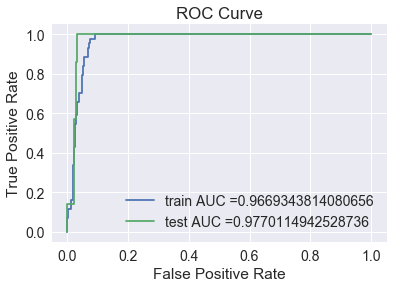

the maximum value of tpr*(1-fpr) 0.9078947368421053 for threshold 0.094
Train confusion matrix
[[483  49]
 [  0  44]]
Test confusion matrix
[[150  24]
 [  0   7]]


In [130]:
from sklearn.metrics import roc_curve, auc

clf = SGDClassifier(loss='hinge',alpha=10,penalty='l2',class_weight='balanced')
clf.fit(X_train_bowl, y_train_bowl)

calibrated = CalibratedClassifierCV(clf,method='sigmoid',cv='prefit')
calibrated.fit(X_train_bowl,y_train_bowl)

y_train_pred = calibrated.predict_proba(X_train_bowl)[:,1] 
y_test_pred = calibrated.predict_proba(X_test_bowl)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_bowl, calibrated.predict_proba(X_train_bowl)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_bowl, calibrated.predict_proba(X_test_bowl)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_bowl, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test_bowl, predict_with_best_t(y_test_pred, best_t)))



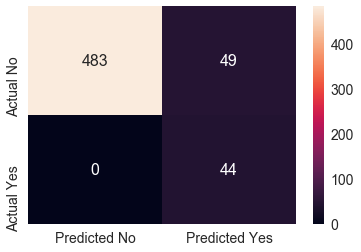

In [131]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train_bowl, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

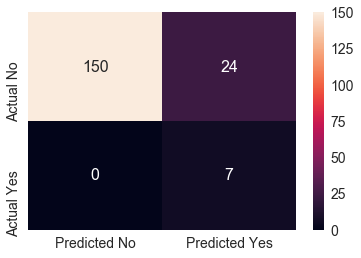

In [132]:
df_cm = pd.DataFrame(confusion_matrix(y_test_bowl, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted No','Predicted Yes']    
df_cm = df_cm.rename({0: 'Actual No', 1: 'Actual Yes'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Lets Test with a Query Point for Support Vector Machine

In [133]:
X_Query_Point_Pos=[2019,120,1500,50,250,24.5,4.45,30.3,7,3]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the SVM classifier is',y_train_pred_Query_p)

Predicted Value by the SVM classifier is [1]


In [134]:
X_Query_Point_Neg=[2014,40,100,2,45,44.5,6.45,50.3,0,0]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the SVM classifier is',y_train_pred_Query_n)

Predicted Value by the SVM classifier is [0]


### Random Forest

Estimators =  10 Train Score 1.0 test Score 1.0
Estimators =  50 Train Score 1.0 test Score 1.0
Estimators =  100 Train Score 1.0 test Score 1.0
Estimators =  250 Train Score 1.0 test Score 1.0
Estimators =  450 Train Score 1.0 test Score 1.0


Text(0.5,1,'Estimators vs score at depth of 4')

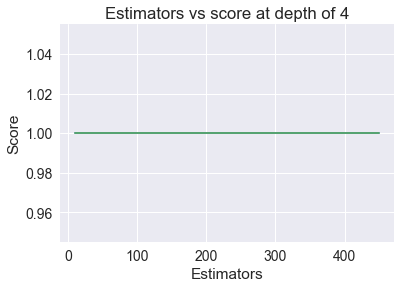

In [135]:
from sklearn.ensemble import RandomForestClassifier

estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_weight_fraction_leaf=0.0, n_estimators=i,verbose=0,warm_start=False)
    clf.fit(X_train_bowl,y_train_bowl)
    train_sc = roc_auc_score(y_train_bowl,clf.predict(X_train_bowl))
    test_sc = roc_auc_score(y_test_bowl,clf.predict(X_test_bowl))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 4')

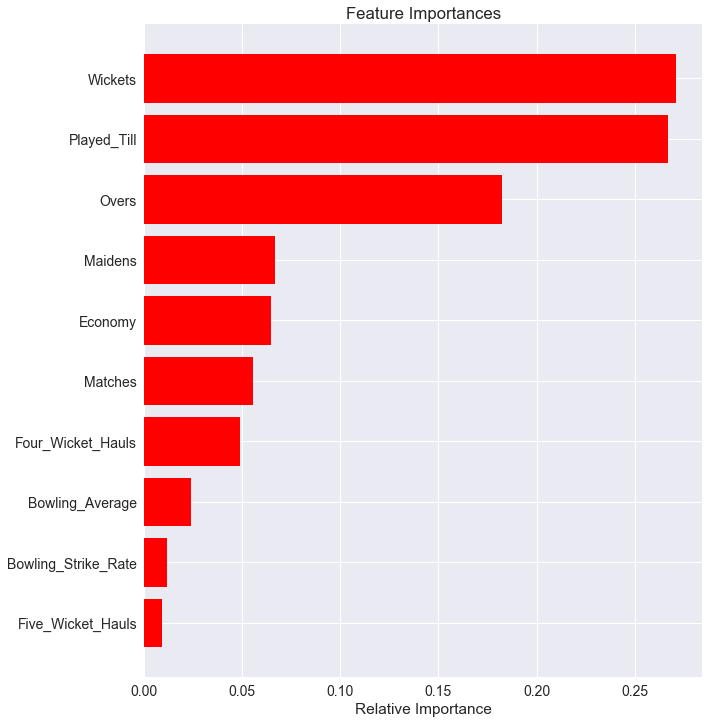

In [136]:
features = bowling_data.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Lets Test with a Query Point for Random Forest

In [137]:
X_Query_Point_Pos=[2019,120,1500,50,250,24.5,4.45,30.3,7,3]
X_Query_Point_Pos_Arr=np.array(X_Query_Point_Pos)
y_train_pred_Query_p = clf.predict(X_Query_Point_Pos_Arr.reshape(1,-1))
print('Predicted Value by the Random Forest classifier is',y_train_pred_Query_p)

Predicted Value by the Random Forest classifier is [1]


In [138]:
X_Query_Point_Neg=[2014,40,100,2,45,44.5,6.45,50.3,0,0]
X_Query_Point_Neg_Arr=np.array(X_Query_Point_Neg)
y_train_pred_Query_n = clf.predict(X_Query_Point_Neg_Arr.reshape(1,-1))
print('Predicted Value by the Random Forest classifier is',y_train_pred_Query_n)

Predicted Value by the Random Forest classifier is [0]


### Conclusion

We did the following things in this notebook

1.Loaded the required Data into dataframes

2.Performed Exploratory Data Analysis

3.Analysed which features are important to predict the class label

4.Built the classification Models

5.Tested the output with a query point